In [ ]:
import tensorflow as tf

tf.enable_eager_execution()

In [ ]:
print(tf.add(1,2))

In [ ]:
print(tf.add([1,2],[3,4]))

In [ ]:
print(tf.reduce_sum([1,2,3]))

In [ ]:
print(tf.encode_base64('Hello World'))

In [ ]:
x = tf.matmul([[1]], [[2,3]])
print(x.dtype)
print(x.shape)

In [ ]:
x = tf.random_uniform([3,3])

In [ ]:
tf.test.is_gpu_available()

In [ ]:
x.device

# Gradient

In [ ]:
x = tf.constant(3.0)

with tf.GradientTape(persistent=True) as t:
    t.watch(x)
    y = x * x
    z = y * y
    
dz_dx = t.gradient(z, x)
dz_dy = t.gradient(z, y)

print(dz_dx)
print(dz_dy)

del t   


# Custom training

In [ ]:
import tensorflow as tf
tf.enable_eager_execution()

In [ ]:
x = tf.zeros([10,10])
x += 2

print(x)

In [ ]:
v = tf.Variable(1.0)
assert v.numpy() == 1.0

In [ ]:
v.assign(3.0)
assert v.numpy() == 3.0

In [ ]:
v.assign(tf.square(v))
assert v.numpy() == 9
print(v.numpy())

In [ ]:
class Model:
    def __init__(self):
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
        
    def __call__(self, x):
        return self.W * x + self.b

In [ ]:
model = Model()
assert model(3.0).numpy() == 15.0

In [ ]:
def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

In [ ]:
# Set up training data
TRUE_W = 3.0
TRUE_b = 2.0
NUMBER_EXAMPLES = 1000

inputs = tf.random_normal([NUMBER_EXAMPLES])
noise = tf.random_normal([NUMBER_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')

plt.show()

print("Current loss: ")
print(loss(model(inputs), outputs).numpy())

In [ ]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
        
    dW, db = t.gradient(current_loss, [model.W, model.b])
    
#     print(dW.numpy(), db.numpy())
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)
#     model.W.assign(model.W - dW * learning_rate)
#     model.b.assign(model.W - db * learning_rate)
    

In [ ]:
model = Model()

Ws, bs = [], []
epochs = range(20)

for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)
    
    train(model, inputs, outputs, learning_rate=0.1)
    
    print("Epoch: {0:2d}, W: {1:1.2f}, b: {2:1.2f}, loss: {3:2.5f}".format(
        epoch, Ws[-1], bs[-1], current_loss))


plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')

plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')

plt.legend(['W', 'b', 'true W', 'true b'])
plt.show()

# Custom layers

In [1]:
import tensorflow as tf

tf.enable_eager_execution()

In [3]:
layer = tf.keras.layers.Dense(10, input_shape=(None, 5))

In [5]:
layer(tf.zeros([10,5]))

<tf.Tensor: id=34, shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [6]:
layer.variables

[<tf.Variable 'dense/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.31542844, -0.00586045, -0.25703397, -0.5617318 ,  0.0331133 ,
          0.08137304, -0.14720654,  0.55119056,  0.24532956, -0.01197535],
        [-0.42493513,  0.28641617,  0.32929212, -0.49502224, -0.09565264,
          0.22535199,  0.16673738,  0.52115613, -0.00161421, -0.38190278],
        [-0.4615066 ,  0.3571471 , -0.60145223, -0.3021813 , -0.32008058,
          0.3478796 , -0.04193944, -0.56716883, -0.06827343, -0.29672816],
        [ 0.62646407, -0.22596449, -0.41057035, -0.13377696,  0.2496022 ,
         -0.19636005, -0.52688307, -0.06656992, -0.49761808, -0.35064688],
        [-0.20275652,  0.37815207, -0.2457189 ,  0.18290395,  0.5000045 ,
          0.33974892, -0.30234763,  0.07497495, -0.34181443,  0.4032325 ]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [7]:
layer.kernel, layer.bias

(<tf.Variable 'dense/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.31542844, -0.00586045, -0.25703397, -0.5617318 ,  0.0331133 ,
          0.08137304, -0.14720654,  0.55119056,  0.24532956, -0.01197535],
        [-0.42493513,  0.28641617,  0.32929212, -0.49502224, -0.09565264,
          0.22535199,  0.16673738,  0.52115613, -0.00161421, -0.38190278],
        [-0.4615066 ,  0.3571471 , -0.60145223, -0.3021813 , -0.32008058,
          0.3478796 , -0.04193944, -0.56716883, -0.06827343, -0.29672816],
        [ 0.62646407, -0.22596449, -0.41057035, -0.13377696,  0.2496022 ,
         -0.19636005, -0.52688307, -0.06656992, -0.49761808, -0.35064688],
        [-0.20275652,  0.37815207, -0.2457189 ,  0.18290395,  0.5000045 ,
          0.33974892, -0.30234763,  0.07497495, -0.34181443,  0.4032325 ]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>)

In [8]:
class MyDenseLayer(tf.keras.layers.Layer):
    def __init__(self, num_outputs):
        super().__init__()
        self.num_outputs = num_outputs
        
    def build(self, input_shape):
        self.kernel = self.add_variable("kernel", 
                                        shape=[int(input_shape[-1]), self.num_outputs])
        
    def call(self, inputs):
        return tf.matmul(inputs, self.kernel)
    


In [9]:
layer = MyDenseLayer(10)
print(layer(tf.zeros([10,5])))
print(layer.trainable_variables)

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(10, 10), dtype=float32)
[<tf.Variable 'my_dense_layer/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[ 2.2133058e-01,  2.5639480e-01, -2.6613456e-01,  1.1634922e-01,
        -3.6579970e-01, -2.8398392e-01,  5.0577223e-02,  4.7204894e-01,
         1.3260758e-01,  3.6838418e-01],
       [ 1.3374501e-01, -1.6945022e-01, -2.9858226e-01, -4.8459440e-01,
        -1.9394124e-01, -1.5624335e-01,  1.3810754e-02, -6.3173914e-01,
        -5.5558085e-03,  5.1659733e-01],
       [ 2.6924789e-02, -5.7805455e-01, -1.3834196e-01,  3.6333805e-01,
         3.9060849e-01,  5.6925434e-01, -5.7049674e-01, -1.5171531e-01,
        -1.3054043e-01,  3.9656168e-

In [10]:
class ResnetIdentityBlock(tf.keras.Model):
    def __init__(self, kernel_size, filters):
        super().__init__(name='')
        filter1, filter2, filter3 = filters
        
        self.conv2a = tf.keras.layers.Conv2D(filter1, (1, 1))
        self.bn2a = tf.keras.layers.BatchNormalization()
        
        self.conv2b = tf.keras.layers.Conv2D(filter2, kernel_size, padding='same')
        self.bn2b = tf.keras.layers.BatchNormalization()
        
        self.conv2c = tf.keras.layers.Conv2D(filter3, (1, 1))
        self.bn2c = tf.keras.layers.BatchNormalization()
        
    def call(self, input_tensor, training=False):
        x = self.conv2a(input_tensor)
        x = self.bn2a(x, training=training)
        x = tf.nn.relu(x)
        
        x = self.conv2b(x)
        x = self.bn2b(x, training=training)
        x = tf.nn.relu(x)
        
        x = self.conv2c(x)
        x = self.bn2c(x, training=training)
        
        x += input_tensor
        
        return tf.nn.relu(x)
    
    

In [12]:
block = ResnetIdentityBlock(1, [1, 2, 3])
print(block(tf.zeros([1, 2, 3, 3])))
print([x.name for x in block.trainable_variables])

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]], shape=(1, 2, 3, 3), dtype=float32)
['resnet_identity_block_1/conv2d_3/kernel:0', 'resnet_identity_block_1/conv2d_3/bias:0', 'resnet_identity_block_1/batch_normalization_3/gamma:0', 'resnet_identity_block_1/batch_normalization_3/beta:0', 'resnet_identity_block_1/conv2d_4/kernel:0', 'resnet_identity_block_1/conv2d_4/bias:0', 'resnet_identity_block_1/batch_normalization_4/gamma:0', 'resnet_identity_block_1/batch_normalization_4/beta:0', 'resnet_identity_block_1/conv2d_5/kernel:0', 'resnet_identity_block_1/conv2d_5/bias:0', 'resnet_identity_block_1/batch_normalization_5/gamma:0', 'resnet_identity_block_1/batch_normalization_5/beta:0']


# Custom training

In [1]:
from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt

import tensorflow as tf

tf.enable_eager_execution()

print("TF version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TF version: 1.12.0
Eager execution: True


In [2]:
# Download dataset
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the data file: {}".format(train_dataset_fp))

Local copy of the data file: /home/osiris/.keras/datasets/iris_training.csv


In [3]:
!head -n 5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [4]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [5]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(train_dataset_fp, batch_size, 
                                                      column_names=column_names,
                                                      label_name=label_name)

In [6]:
features, labels = next(iter(train_dataset))

features

OrderedDict([('sepal_length',
              <tf.Tensor: id=84, shape=(32,), dtype=float32, numpy=
              array([4.9, 5.7, 5.9, 7.2, 5.8, 5. , 6.2, 5.2, 5. , 4.6, 4.8, 4.7, 5. ,
                     4.4, 5.1, 5.1, 4.9, 4.6, 4.9, 4.9, 5. , 6.5, 6.8, 5.8, 5. , 5.7,
                     4.8, 5.8, 6.7, 5.4, 6.4, 4.8], dtype=float32)>),
             ('sepal_width',
              <tf.Tensor: id=85, shape=(32,), dtype=float32, numpy=
              array([3.1, 3.8, 3. , 3.2, 2.7, 2. , 2.8, 3.5, 3.4, 3.4, 3.1, 3.2, 3. ,
                     3.2, 3.7, 2.5, 3.1, 3.6, 3.1, 2.4, 3.2, 3. , 3.2, 2.6, 3.3, 2.8,
                     3. , 2.7, 3. , 3.4, 3.2, 3. ], dtype=float32)>),
             ('petal_length',
              <tf.Tensor: id=82, shape=(32,), dtype=float32, numpy=
              array([1.5, 1.7, 5.1, 6. , 4.1, 3.5, 4.8, 1.5, 1.5, 1.4, 1.6, 1.6, 1.6,
                     1.3, 1.5, 3. , 1.5, 1. , 1.5, 3.3, 1.2, 5.2, 5.9, 4. , 1.4, 4.1,
                     1.4, 5.1, 5. , 1.5, 5.3, 1.4],

Text(0, 0.5, 'sepal_length')

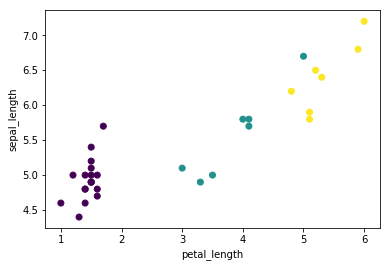

In [7]:
plt.scatter(features['petal_length'].numpy(),
            features['sepal_length'].numpy(),
            c=labels.numpy(), cmap='viridis')

plt.xlabel('petal_length')
plt.ylabel('sepal_length')

In [8]:
# Format features for model
def pack_features_vector(features, labels):
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

In [9]:
train_dataset = train_dataset.map(pack_features_vector)

In [10]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[6.7 3.1 4.4 1.4]
 [6.2 2.2 4.5 1.5]
 [5.6 2.9 3.6 1.3]
 [5.5 2.4 3.7 1. ]
 [6.1 2.6 5.6 1.4]], shape=(5, 4), dtype=float32)


In [11]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(3)                         
])

In [23]:
predictions = model(features)
predictions[:5]

<tf.Tensor: id=426, shape=(5, 3), dtype=float32, numpy=
array([[-0.22368008,  2.073096  , -3.5300202 ],
       [-0.325368  ,  1.6196506 , -3.3221939 ],
       [-0.03179008,  1.8437651 , -2.8398697 ],
       [-0.309165  ,  1.6313659 , -2.982684  ],
       [-0.40719372,  1.3647903 , -3.2052827 ]], dtype=float32)>

In [24]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: id=432, shape=(5, 3), dtype=float32, numpy=
array([[0.09108523, 0.9055765 , 0.00333828],
       [0.12432078, 0.8694699 , 0.00620924],
       [0.1318433 , 0.86020374, 0.00795288],
       [0.12451044, 0.8668973 , 0.00859234],
       [0.14402084, 0.8472045 , 0.00877467]], dtype=float32)>

In [25]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("Label     : {}".format(labels))

Prediction: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Label     : [1 1 1 1 2 2 0 1 2 2 0 0 1 2 0 1 1 2 0 0 2 0 0 1 0 1 2 0 0 2 2 0]


In [27]:
def loss(model, x, y):
    y_ = model(x)
    return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)


l = loss(model, features, labels)
print("Loss test: {}".format(l))

Loss test: 2.494856357574463


In [28]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)